In [21]:
import pandas as pd
import pickle
import numpy as np
from sklearn import metrics, neighbors
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
# from .src.functions import f_point_5, argmax

# from ..src.functions import f_point_5, argmax

In [22]:
results_path = ['clus_0.03_task2', 'clus_pca_0.03_task2', 'w2v_0.01_task2']

In [23]:
def calculate_auc(result_path):
    obs_prod = f"{result_path}_y_test.pickle"
    pred_prod = f"{result_path}_y_pred_prob.pickle"

    with open(obs_prod, 'rb') as f:
        obs_prod = pickle.load(f)

    with open(pred_prod, 'rb') as f:
        pred_prod = pickle.load(f)

    fpr, tpr, _ = metrics.roc_curve(obs_prod, pred_prod, pos_label=True)
    auc = metrics.auc(fpr, tpr)
    accuracy = accuracy_score(obs_prod, [True if x > 0.5 else False for x in pred_prod])

    print(" =====> ", result_path, " <========")
    print("AUROC:", auc)
    print("Accuracy:", accuracy)

    return fpr, tpr, auc

In [24]:
results = {}

for result_path in results_path:
    fpr, tpr, auc = calculate_auc(result_path)
    results[result_path] = (fpr, tpr, auc)

 =====>  clus_0.03_task2  <========
AUROC: 0.5652251523015924
Accuracy: 0.5453343001450217
 =====>  clus_pca_0.03_task2  <========
AUROC: 0.5990810414414891
Accuracy: 0.5718632794919238
 =====>  w2v_0.01_task2  <========
AUROC: 0.5350162056767493
Accuracy: 0.5247162074311147


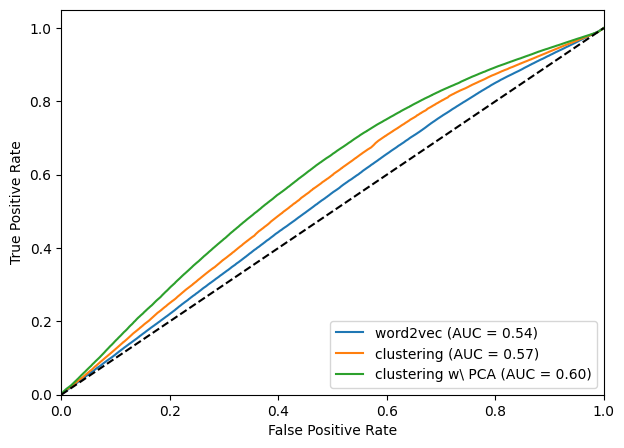

In [32]:
plt.figure(figsize=(7, 5))

(fpr, tpr, auc) = results['w2v_0.01_task2']
plt.plot(fpr, tpr, label=f'word2vec (AUC = {auc:.2f})')


(fpr, tpr, auc) = results['clus_0.03_task2']
plt.plot(fpr, tpr, label=f'clustering (AUC = {auc:.2f})')

(fpr, tpr, auc) = results['clus_pca_0.03_task2']
plt.plot(fpr, tpr, label=f'clustering w\ PCA (AUC = {auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic for Various Embeddings on Ours(E-HyperGCN+)')
plt.legend(loc="lower right")
# plt.show()
plt.savefig("roc_curve.pdf", format="pdf", bbox_inches="tight")
plt.show()